In [1]:
#---------------------------------------------------------------
# @author Prasanth Moothedath Padmakumar C0796752
# @author Aswathy Kuttisseril Jewel C0813455
# @author Gayathri Ravi Nath C0818959

# Dataset File downloaded from https://www.kaggle.com/datasets/cherngs/heart-disease-cleveland-uci

# Dataset is used predict weather a person has heart deasease or not based on 13 predictors


### Import Libraries

In [1]:
# Pandas library for data manipulation and analysis
# Numpy library for some standard mathematical functions
# Matplotlib library to visualize the data in the form of different plot
# Seaborn library for visualizing statistical graphics and work on top of Matplotlib
# sklearn for random forest classifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
# To display plot within the document
%matplotlib inline

### Read the dataset from csv file

In [2]:
df = pd.read_csv('heart_cleveland_upload.csv')

In [4]:
# Display first 5 rows of the dataset using head function
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


### Checking data set for null values and duplicate entries

In [5]:
# Print summary of the dataframe 
df.info( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [6]:
# Checking count of duplicate entries in the data set
df.duplicated().sum()

0

In [7]:
# Checking missing values in data set
df.isna().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

In [8]:
# Checking null values in data set
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

In [9]:
# Describing the data set 
df.describe( )

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [10]:
# Display columns in the data set
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'condition'],
      dtype='object')

In [11]:
# Rename columns to readable names
df.columns = ['Age', 'Sex', 'Chest_Pain_Type', 'Resting_Blood_Pressure', 'Cholesterol', 'Fasting_Blood_Sugar', 'Rest_Ecg', 'Max_Heart_Rate_Achieved',
             'Exercise_Induced_Angina', 'St_Depression', 'St_Slope', 'Num_major_vessels', 'Thalassemia', 'Heart_Disease']
df.columns

Index(['Age', 'Sex', 'Chest_Pain_Type', 'Resting_Blood_Pressure',
       'Cholesterol', 'Fasting_Blood_Sugar', 'Rest_Ecg',
       'Max_Heart_Rate_Achieved', 'Exercise_Induced_Angina', 'St_Depression',
       'St_Slope', 'Num_major_vessels', 'Thalassemia', 'Heart_Disease'],
      dtype='object')

### Exploratory analysis

#### Age comparison

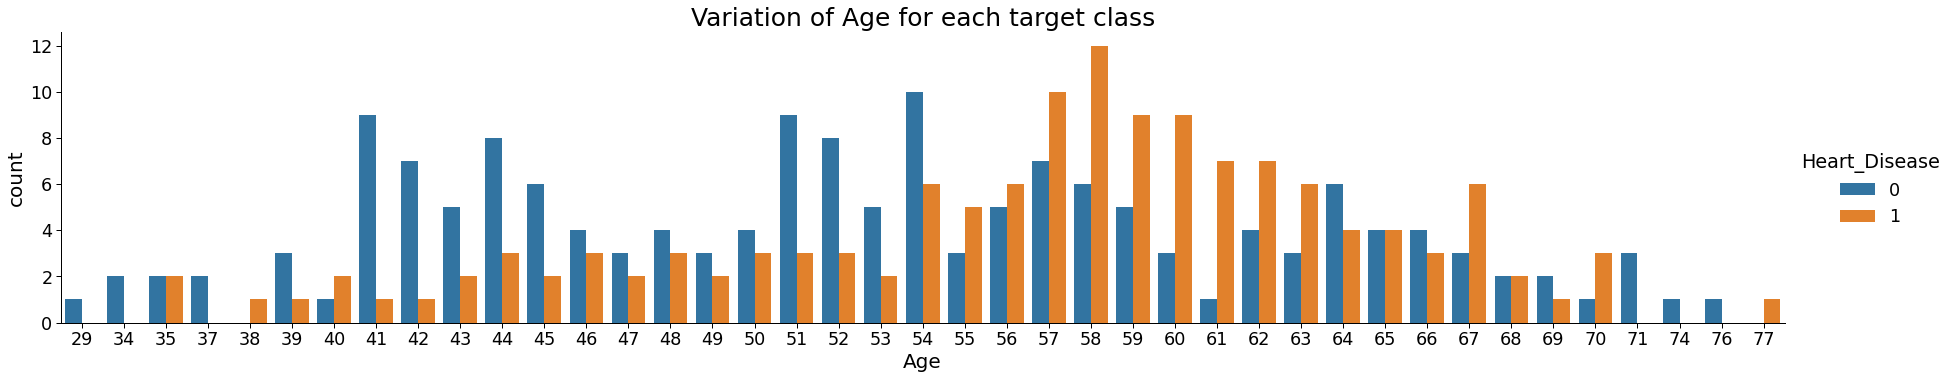

In [12]:
sns.set_context("paper", font_scale = 2, rc = {"font.size": 20,"axes.titlesize": 25,"axes.labelsize": 20}) 
sns.catplot(kind = 'count', data = df, x = 'Age', hue = 'Heart_Disease', order = df['Age'].sort_values().unique(), height=5, aspect=5)
plt.title('Variation of Age for each target class')
plt.show()

The age which people suffer heart disease the most is 58 followed by 57

In [13]:
minAge=min(df.Age)
maxAge=max(df.Age)
meanAge=df.Age.mean()
print('Min Age :',minAge)
print('Max Age :',maxAge)
print('Mean Age :',meanAge)

Min Age : 29
Max Age : 77
Mean Age : 54.54208754208754


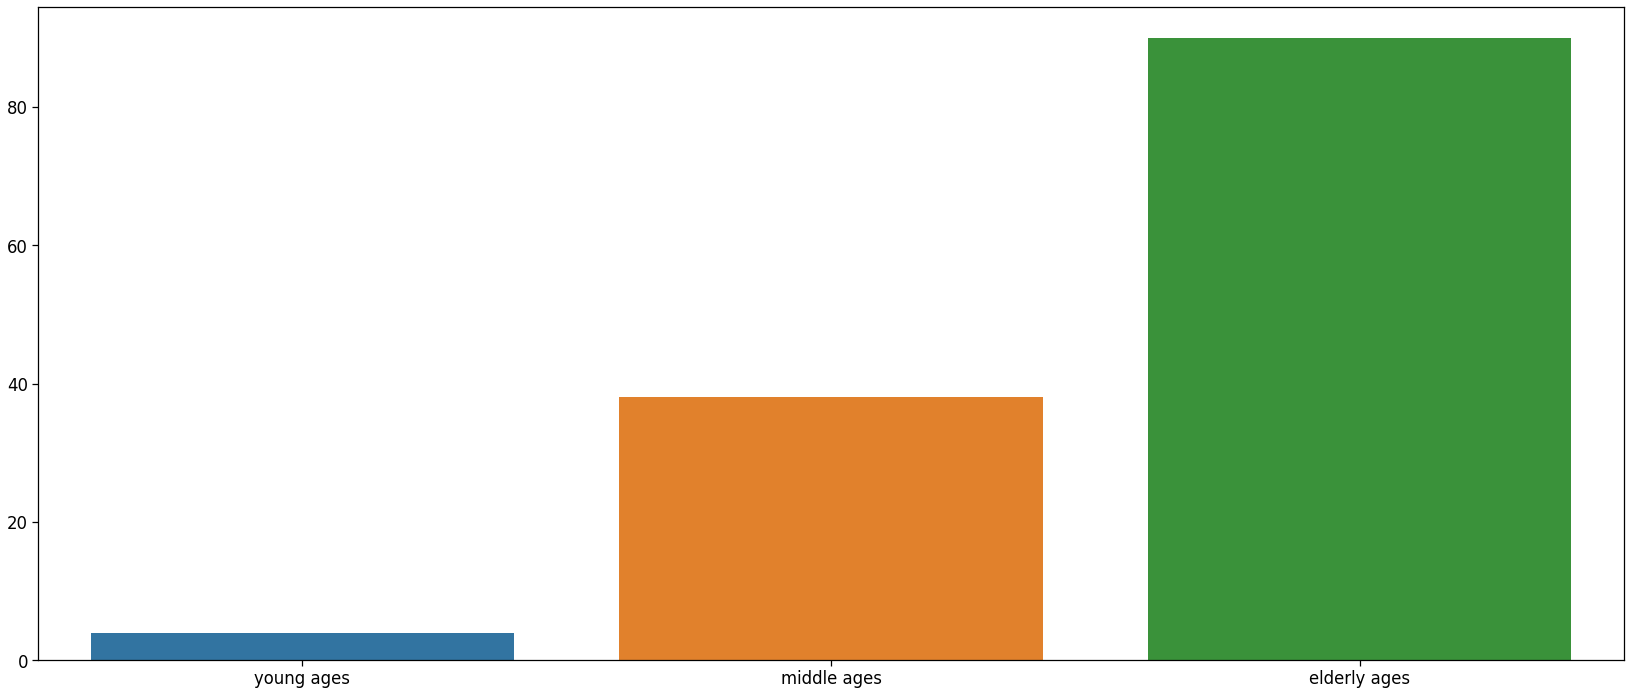

In [14]:
Young = df[(df.Age>=29)&(df.Age<40)&(df.Heart_Disease==1)]
Middle = df[(df.Age>=40)&(df.Age<55)&(df.Heart_Disease==1)]
Elder = df[(df.Age>55)&(df.Heart_Disease==1)]

# Plot as bargraph to find out which age group is most affected to heart disease
plt.figure(figsize=(23,10))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=['young ages','middle ages','elderly ages'],y=[len(Young),len(Middle),len(Elder)])
plt.tight_layout()

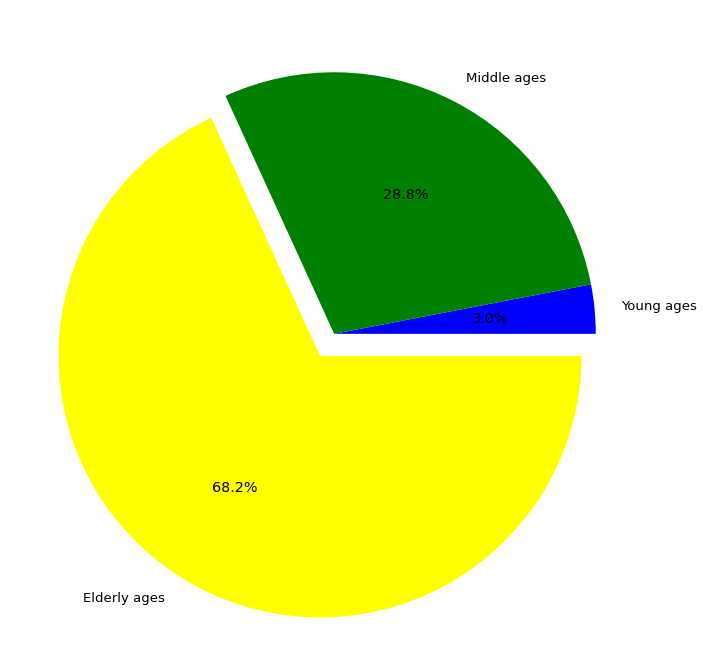

In [15]:
# Plot it as pie chart
colors = ['blue','green','yellow']
explode = [0,0,0.1]
plt.figure(figsize=(10,10))
sns.set_context('notebook',font_scale = 1.2)
plt.pie([len(Young),len(Middle),len(Elder)],labels=['Young ages','Middle ages','Elderly ages'],explode=explode,colors=colors, autopct='%1.1f%%')
plt.tight_layout()

#### Age and gender distribution for each target class

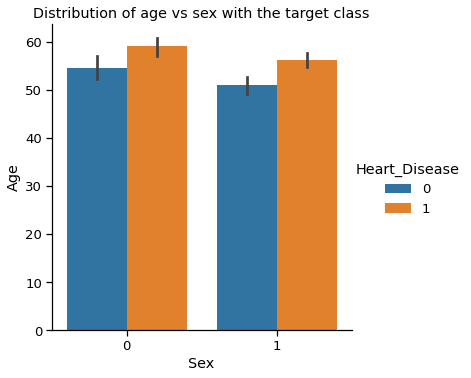

In [16]:
sns.catplot(kind = 'bar', data = df, y = 'Age', x = 'Sex', hue = 'Heart_Disease')
plt.title('Distribution of age vs sex with the target class')
plt.show()

We see that for females who are suffering from the disease are older than males.

#### Comparing Chest pain types

Text(0.5, 1.0, 'Chest Pain Type v/s Heart_Disease\n')

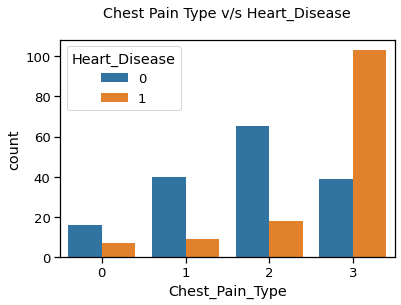

In [17]:
sns.countplot(data= df, x='Chest_Pain_Type',hue='Heart_Disease')
plt.title('Chest Pain Type v/s Heart_Disease\n')

asymptomatic chest pain is the most common in heart disease patients

#### Relating heart disease with Thalassemia

Threed different types of Thalassemia : normal (0), fixed defect (1) ,reversable defect (2)


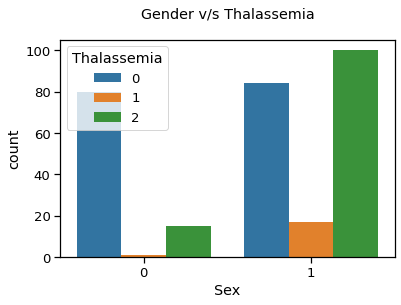

In [18]:
sns.countplot(data= df, x='Sex',hue='Thalassemia')
plt.title('Gender v/s Thalassemia\n')
print('Threed different types of Thalassemia : normal (0), fixed defect (1) ,reversable defect (2)')

Most females are showing Normal Thalassemia, while majority of males show reversable defect Thalassemia

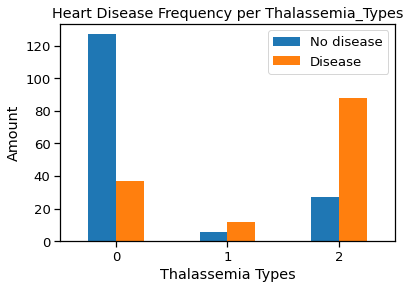

In [19]:
pd.crosstab(df['Thalassemia'],df['Heart_Disease']).plot(kind='bar')
plt.title("Heart Disease Frequency per Thalassemia_Types")
plt.xlabel("Thalassemia Types")
plt.ylabel("Amount")
plt.legend(['No disease','Disease'])
plt.xticks(rotation=0);

Here we can see type 2 Thalassemia patients have most chance of heart Disease

#### Comparing ECG result and heart disease

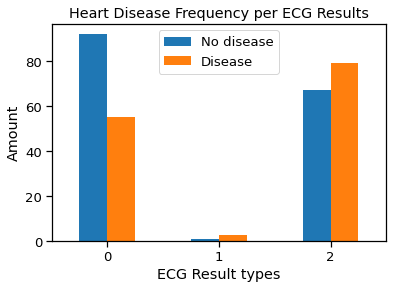

In [20]:
pd.crosstab(df['Rest_Ecg'],df['Heart_Disease']).plot(kind='bar')
plt.title("Heart Disease Frequency per ECG Results")
plt.xlabel("ECG Result types")
plt.ylabel("Amount")
plt.legend(['No disease','Disease'])
plt.xticks(rotation=0);

Type 1 ECG result type is more prone to heart disease

#### Comparing fasting blood sugar and heart disease

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

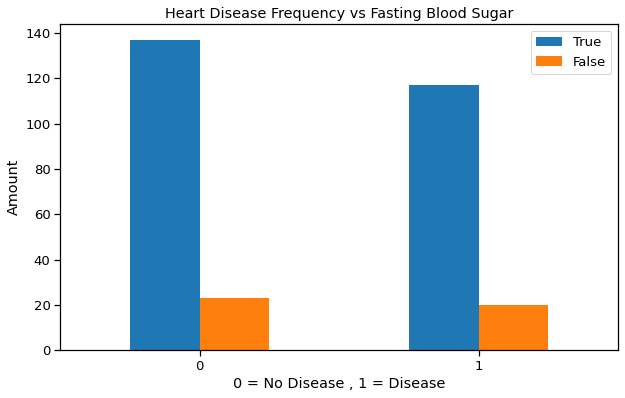

In [21]:
pd.crosstab(df['Heart_Disease'],df['Fasting_Blood_Sugar']).plot(kind="bar",figsize=(10,6));
plt.title("Heart Disease Frequency vs Fasting Blood Sugar")
plt.xlabel("0 = No Disease , 1 = Disease")
plt.ylabel("Amount")
plt.legend(["True","False"])
plt.xticks(rotation=0)

We can see that Fasting Blood Sugar is not so realted to Heart disease

#### Comparing Chest pain types and resting blood pressure with respect to gender

Text(17.157001071428574, 0.5, 'Blood Pressure Rate')

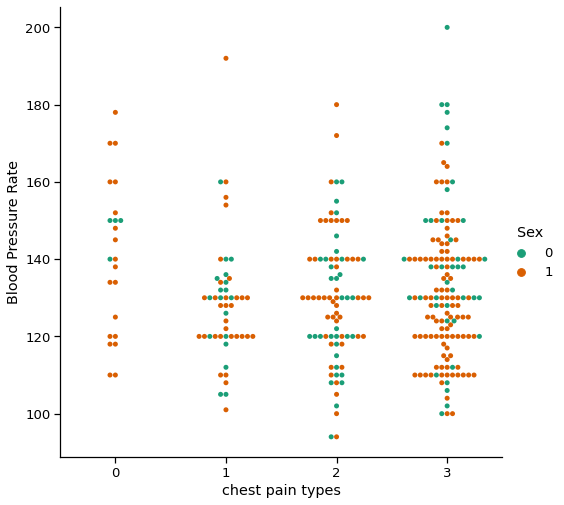

In [22]:
sns.catplot(x="Chest_Pain_Type", y="Resting_Blood_Pressure",hue="Sex",kind ="swarm" ,data=df,palette="Dark2", height=7)
plt.xlabel('chest pain types')
plt.ylabel('Blood Pressure Rate')

Catplot shows that Males with higher blood pressure have more chances of heart disease compared to females

### Modelling

#### Imports

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

#### Train & Test Split

In [58]:
X=df.drop('Heart_Disease',axis=1)
Y=df['Heart_Disease']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

#### RandomForestClassifier

In [59]:
rf=RandomForestClassifier()

In [60]:
rf.fit(X_train,Y_train)

RandomForestClassifier()

In [61]:
rf.score(X_train,Y_train)

0.9957805907172996

In [62]:
# Predict test variables
Y_pred = rf.predict(X_test)

In [63]:
# Accuracy
rf.score(X_test,Y_test)

0.7666666666666667

In [64]:
# Comparing test and prediction for first 10 values
diffTable = pd.DataFrame({'Actual-Value': Y_test, 'Predicted-Value':Y_pred})
diffTable.head(10)

,Actual-Value,Predicted-Value
167,1,1
211,1,1
63,0,0
154,0,0
5,0,0
77,0,0
183,1,1
158,1,1
9,0,1
139,0,0


8 out of 10 predictions are correct, which equals to the 80% accuracy

#### Model Evaluation

Text(-1.5, 0.5, 'Predicted Label')

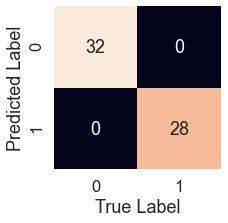

In [51]:
# Plotting Confusion matrix
sns.set(font_scale=1.5)
fig,ax=plt.subplots(figsize=(3,3))
ax=sns.heatmap(confusion_matrix(Y_test,Y_pred),annot=True,cbar=False)
plt.xlabel("True Label")
plt.ylabel("Predicted Label")

In [42]:
# Classification report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        28

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60

